<a href="https://colab.research.google.com/github/XMad0/Python/blob/master/TP_01_CNN_2022_MNIST_Handwritten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *** TP 01 - CNN 2022 MNIST Handwritten *** 

# **Par Bellaouar Mahmoud - Ghardaia**


# *Importer des bibliothèques*

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets.mnist import load_data
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
#from numpy import unique,argmax
#from tensorflow.keras import datasets, layers, models

In [2]:
# upload Handwritten data set
#(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

(x_train, y_train), (x_test, y_test) = load_data()
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
#Normalistation la valeur de pixels des images
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float32")/255.0 

[5 0 4 1 9 2 1 3 1]


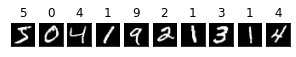

In [4]:
figure = plt.figure(figsize=(5,5))
print(y_train[0:9])
for i in range(10):
  a = figure.add_subplot(1,10,i+1,xticks=[],yticks=[])
  a.imshow(np.squeeze(x_train[i]),cmap='gray')
  a.set_title(y_train[i])  

In [5]:
img_shape = x_train.shape[1:]
print(img_shape)

(28, 28, 1)


In [6]:
# Define le model
model = Sequential()

model.add(Conv2D(32, (3,3),activation='relu', input_shape=(28,28,1))) 
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(48, (3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))

# print summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 48)        13872     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 48)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 48)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1200)              0         
_________________________________________________________________
dense (Dense)                (None, 500)               6

In [21]:
#model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#x = model.fit(x_train,y_train,epochs=5,batch_size=32,verbose=2,validation_split=0.1)

#model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy,metrics=['accuracy'])
#history = model.fit(x_train, y_train, epochs=5,batch_size=32,verbose=2,validation_data=(x_test, y_test))

#Training of the model
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='model_best_weights.hdf5', verbose = 1, save_best_only=True)
history = model.fit(x_train, y_train,batch_size=32,epochs=5,validation_data=(x_test, y_test),callbacks=[checkpointer])

Epoch 1/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0292 - accuracy: 0.9906 - val_loss: 0.0277 - val_accuracy: 0.9909

Epoch 00001: val_loss improved from inf to 0.02772, saving model to model_best_weights.hdf5
Epoch 2/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0288 - accuracy: 0.9911 - val_loss: 0.0198 - val_accuracy: 0.9941

Epoch 00002: val_loss improved from 0.02772 to 0.01985, saving model to model_best_weights.hdf5
Epoch 3/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0244 - accuracy: 0.9919 - val_loss: 0.0241 - val_accuracy: 0.9924

Epoch 00003: val_loss did not improve from 0.01985
Epoch 4/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0225 - accuracy: 0.9925 - val_loss: 0.0197 - val_accuracy: 0.9938

Epoch 00004: val_loss improved from 0.01985 to 0.01967, saving model to model_best_weights.hdf5
Epoch 5/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.02

In [22]:
loss,accuracy = model.evaluate(x_test,y_test,verbose = 0)
print(f'Accuracy est : {100*accuracy:4.2f} % 100')
print(f'Test loss :{loss:4.4f}')
print(f'Test Accuracy {accuracy:4.4f}')

Accuracy est : 99.27 % 100
Test loss :0.0220
Test Accuracy 0.9927


Test le modele


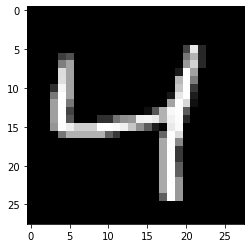

In [23]:
print("Test le modele")
image = x_train[2]
plt.imshow(np.squeeze(image),cmap = 'gray')
plt.show()

In [24]:
image = image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
p = model.predict([image])
print(f'Prediction est : {np.argmax(p)}')

Prediction est : 4


# Conclusion : 

**Les prédicition été très excellent**

**le taux d'erreur est très faible** ***car*** :


> **Existe un seul niveau d'image**

> **Numéro de paramètre élevé**

> **Nombre de filtres dans chacun convolution**